In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
df= pd.read_csv("stores_sales_forecasting.csv", encoding="latin-1")

#Data Exploration

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [5]:
#Let us first take the necessery columns and rename columns
df = df[["Order Date", "Sales"]].copy()
df.columns = ["date", "sales"]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2121 non-null   object 
 1   sales   2121 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.3+ KB


In [7]:
df.describe()

,sales
count,2121.000000
mean,349.834887
std,503.179145
min,1.892000
25%,47.040000
50%,182.220000
75%,435.168000
max,4416.174000


In [8]:
df.duplicated().sum()

3

In [9]:
df.drop_duplicates(keep= "first", inplace= True)

In [10]:
df.duplicated().sum()

0

In [11]:
df["date"] = pd.to_datetime(df["date"], format= "%m/%d/%Y")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2118 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2118 non-null   datetime64[ns]
 1   sales   2118 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 49.6 KB


In [13]:
df.sort_values(by= "date", inplace= True)

In [14]:
df

,date,sales
1577,2014-01-06,2573.820
1626,2014-01-07,76.728
181,2014-01-10,51.940
150,2014-01-11,9.940
1024,2014-01-13,333.999
...,...,...
1057,2017-12-29,101.120
1618,2017-12-29,300.980
1128,2017-12-29,68.460
1617,2017-12-29,1207.840


6th Jan 2014 to 30th December 2017. Let's convert the date to a month period and sum the sales accordingly.

In [15]:
df["date"]= df["date"].dt.to_period("M")

Monthlysales = df.groupby("date").sum().reset_index()

In [16]:
#Converting date to timestamp datatype

Monthlysales["date"]= Monthlysales["date"].dt.to_timestamp()
Monthlysales.head()

,date,sales
0,2014-01-01,6242.525
1,2014-02-01,1839.658
2,2014-03-01,14573.956
3,2014-04-01,7663.465
4,2014-05-01,6912.787


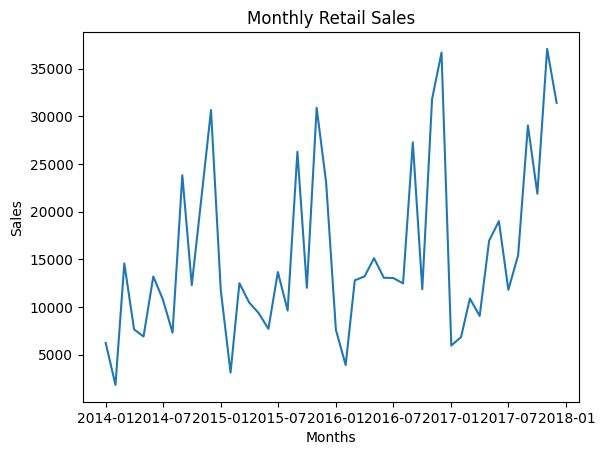

In [17]:
plt.plot(Monthlysales["date"], Monthlysales["sales"])
plt.title("Monthly Retail Sales")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()

#Seasonal Decomposition

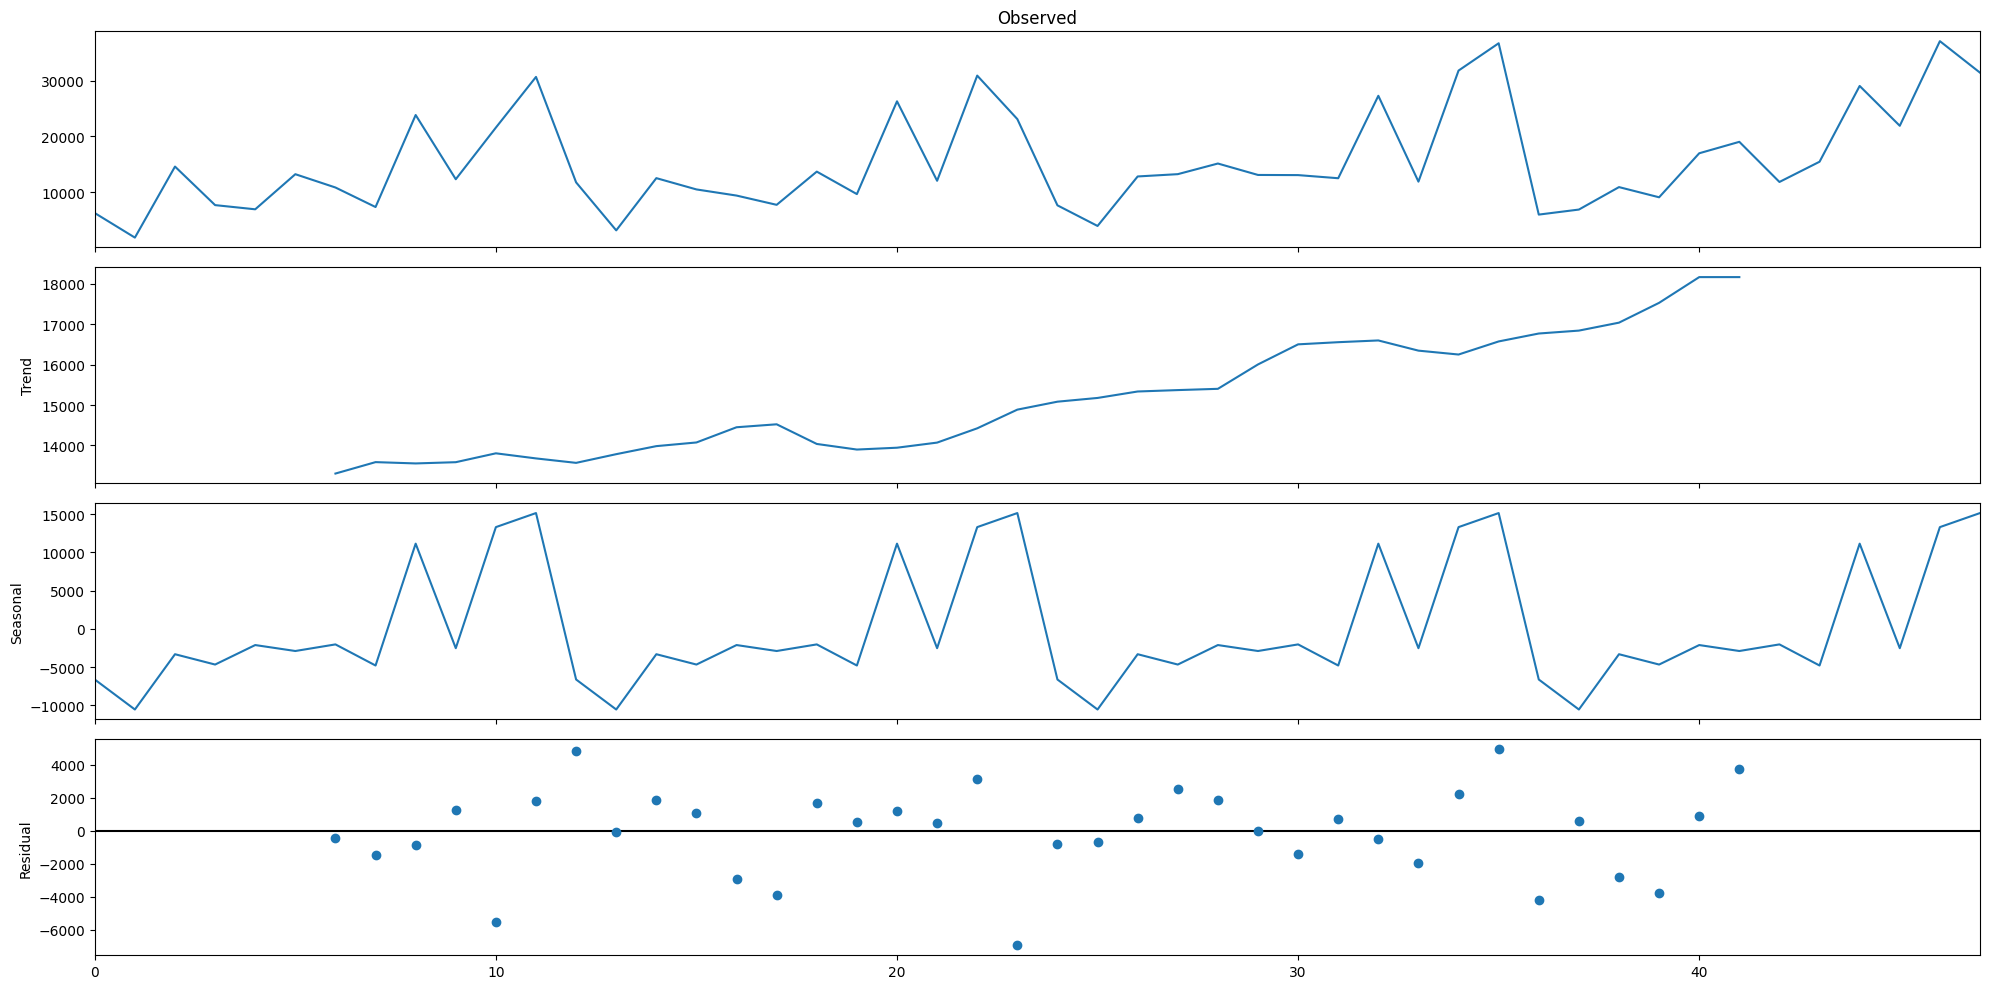

In [18]:
#Seasonal decomposition using moving averages
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 20, 10
decomposition = seasonal_decompose(Monthlysales.sales.values, model='additive', period = 12)

fig = decomposition.plot()
plt.show()

This sales data seems non-stationary as it shows an upward trend as well as some seasonality. For confirmation, we will do ADF test.

#ADF Test

In [19]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [20]:
adf_test(Monthlysales["sales"])

Results of Dickey-Fuller Test:
Test Statistic                 -4.696804
p-value                         0.000085
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


The p value is less than the critical value 0.05 which means we can reject the null hypothesis. Hence, we can say that the data is stationary. However, I am a little worried about the upward trend in the model, so I am going to take the first difference.

In [21]:
Monthlysales["sales_diff"]= Monthlysales["sales"].diff()
Monthlysales.dropna(inplace=True)
Monthlysales.head()

,date,sales,sales_diff
1,2014-02-01,1839.6580,-4402.8670
2,2014-03-01,14573.9560,12734.2980
3,2014-04-01,7663.4650,-6910.4910
4,2014-05-01,6912.7870,-750.6780
5,2014-06-01,13206.1256,6293.3386


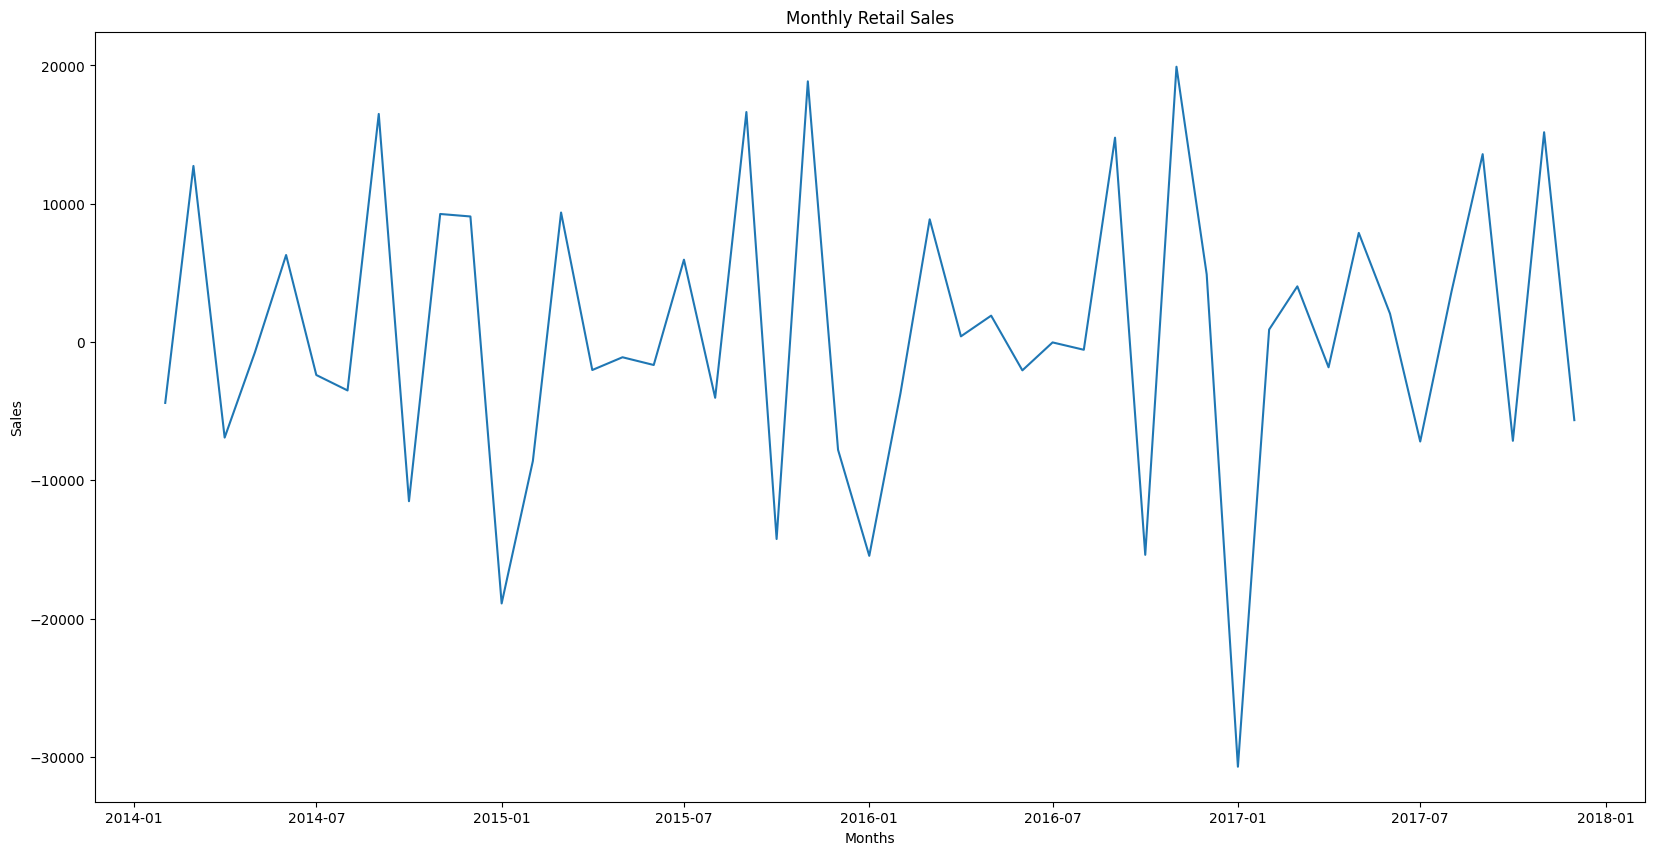

In [22]:
plt.plot(Monthlysales["date"], Monthlysales["sales_diff"])
plt.title("Monthly Retail Sales")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()

In [23]:
adf_test(Monthlysales["sales_diff"])

Results of Dickey-Fuller Test:
Test Statistic                -1.146275e+01
p-value                        5.503564e-21
#Lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64


#ACF and PACF

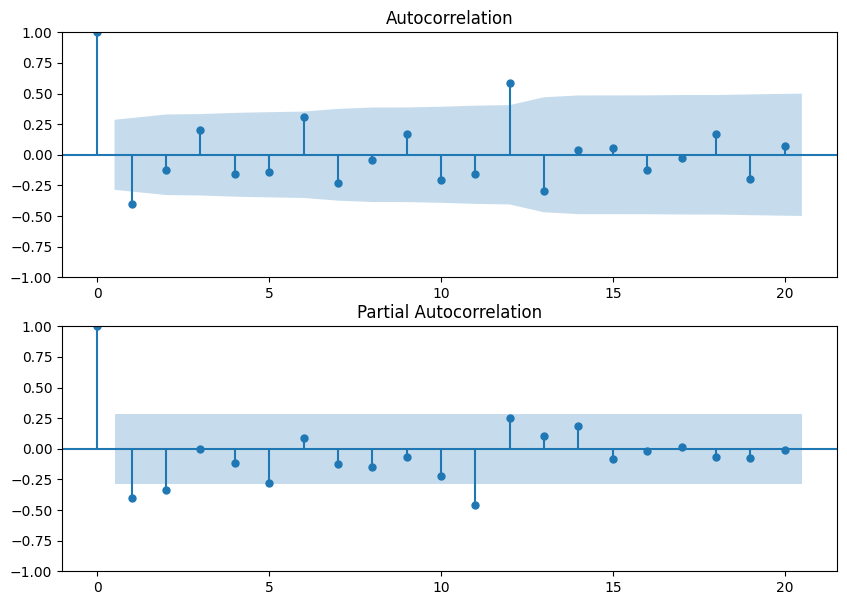

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize = (10,7))
ax1 = fig.add_subplot(211)
fig = plot_acf(Monthlysales["sales_diff"], lags = 20, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(Monthlysales["sales_diff"], lags = 20, method='ywm', ax = ax2)
plt.show()

PACF is strong at lag 1 and 2 while ACF is significant at lag 1. Therefore, q= 1, p=2 and d=1

#Splitting the dataset


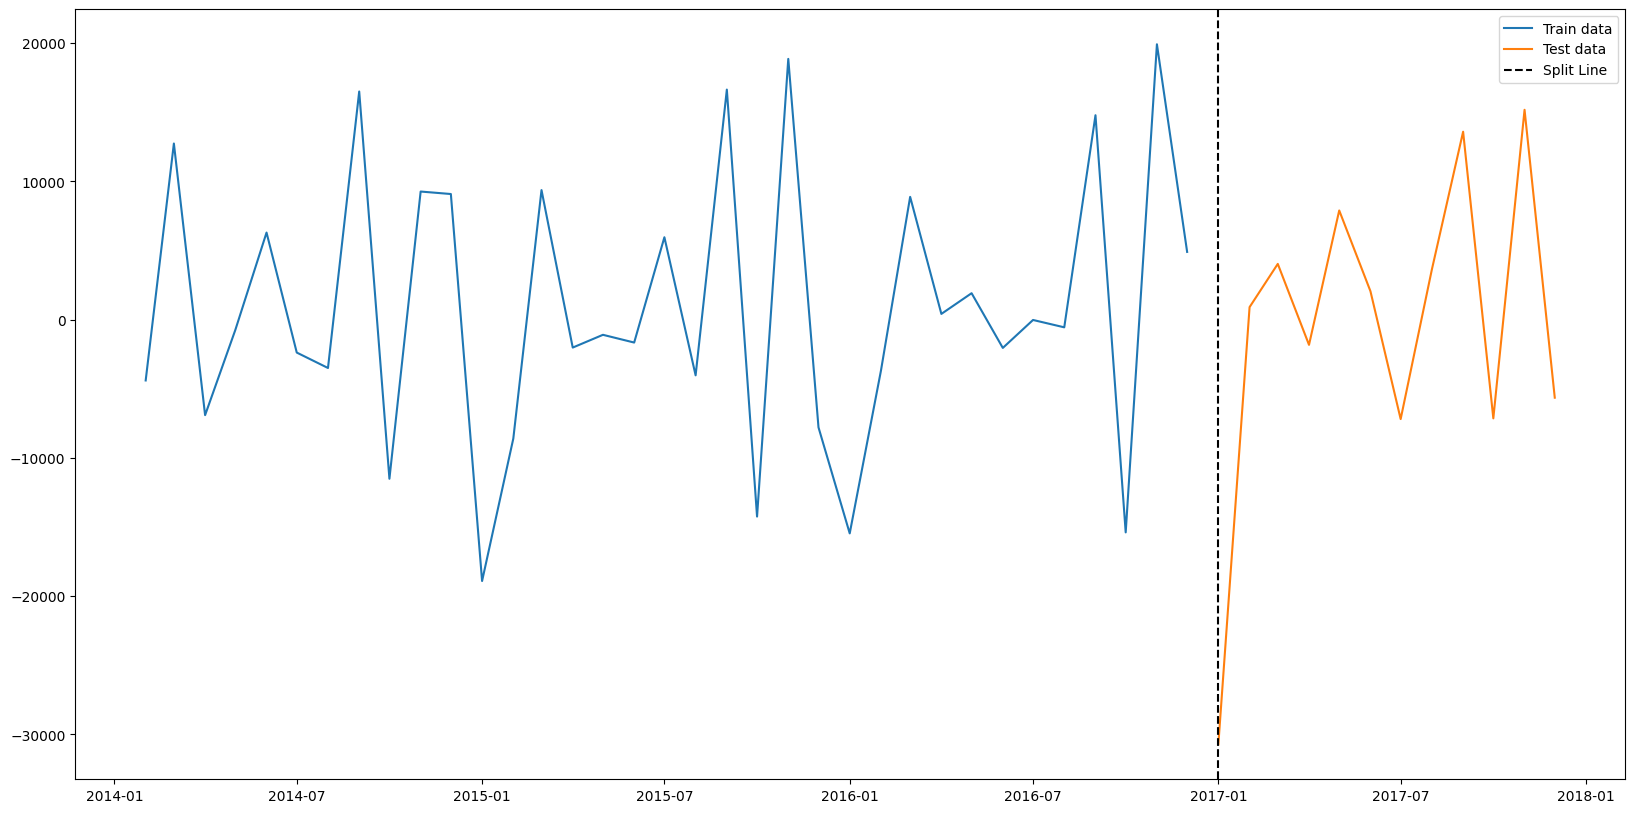

In [25]:
# Split the data into train and test sets

train_end_index = len(Monthlysales) - 12
df_train = Monthlysales[:train_end_index].reset_index(drop=True)
df_test = Monthlysales[train_end_index:].reset_index(drop=True)

from datetime import datetime

plt.plot(df_train["date"], df_train["sales_diff"])
plt.plot(df_test["date"], df_test["sales_diff"])
plt.axvline(datetime(2017, 1, 1), color='black', linestyle='--', label="Split Line")
plt.legend(['Train data','Test data', "Split Line"])
plt.show()

#ARIMA model

In [26]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(df_train["sales_diff"], order = (2,1,1)).fit()

In [27]:
# summary of the model
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:             sales_diff   No. Observations:                   35
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -358.351
Date:                Wed, 12 Jun 2024   AIC                            724.702
Time:                        03:52:39   BIC                            730.807
Sample:                             0   HQIC                           726.784
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5924      0.147     -4.034      0.000      -0.880      -0.305
ar.L2         -0.2976      0.172     -1.733      0.083      -0.634       0.039
ma.L1         -0.9997      0.285     -3.505      0.0

- The coefficients for AR lag1, lag2 and MA lag1 are negatives which indicates that the time series current period is negatively correlated with the time series at those lags.

- The estimated AR lag 1 and MA lag 1, sigma2 are significant (p value < 0.05)

In [28]:
pred_start = df_test.index[0]
pred_end= df_test.index[-1]

# Make predictions
df_test['predicted_sales'] = model_arima.predict(start=pred_start, end=pred_end)

# Get the residuals
df_test['residuals']= df_test['sales_diff'] - df_test['predicted_sales']

In [29]:
df_test

,date,sales,sales_diff,predicted_sales,residuals
0,2017-01-01,5964.0320,-30714.6830,0.000000,-30714.683000
1,2017-02-01,6866.3374,902.3054,-1561.795193,2464.100593
2,2017-03-01,10893.4448,4027.1074,-2177.490162,6204.597562
3,2017-04-01,9065.9581,-1827.4867,2627.064634,-4454.551334
4,2017-05-01,16957.5582,7891.6001,3918.119039,3973.481061
5,2017-06-01,19008.5867,2051.0285,-1585.627156,3636.655656
6,2017-07-01,11813.0220,-7195.5647,1319.913305,-8515.478005
7,2017-08-01,15441.8740,3628.8520,3846.978260,-218.126260
8,2017-09-01,29028.2060,13586.3320,-6030.944018,19617.276018
9,2017-10-01,21884.0682,-7144.1378,3983.065477,-11127.203277


In [30]:
R_squaredARIMA = r2_score(df_test['sales_diff'], df_test['predicted_sales'])
print("R-squared:", R_squaredARIMA)

R-squared: -0.15211731616967583


A negative value of R-squared means the regression model is poor.

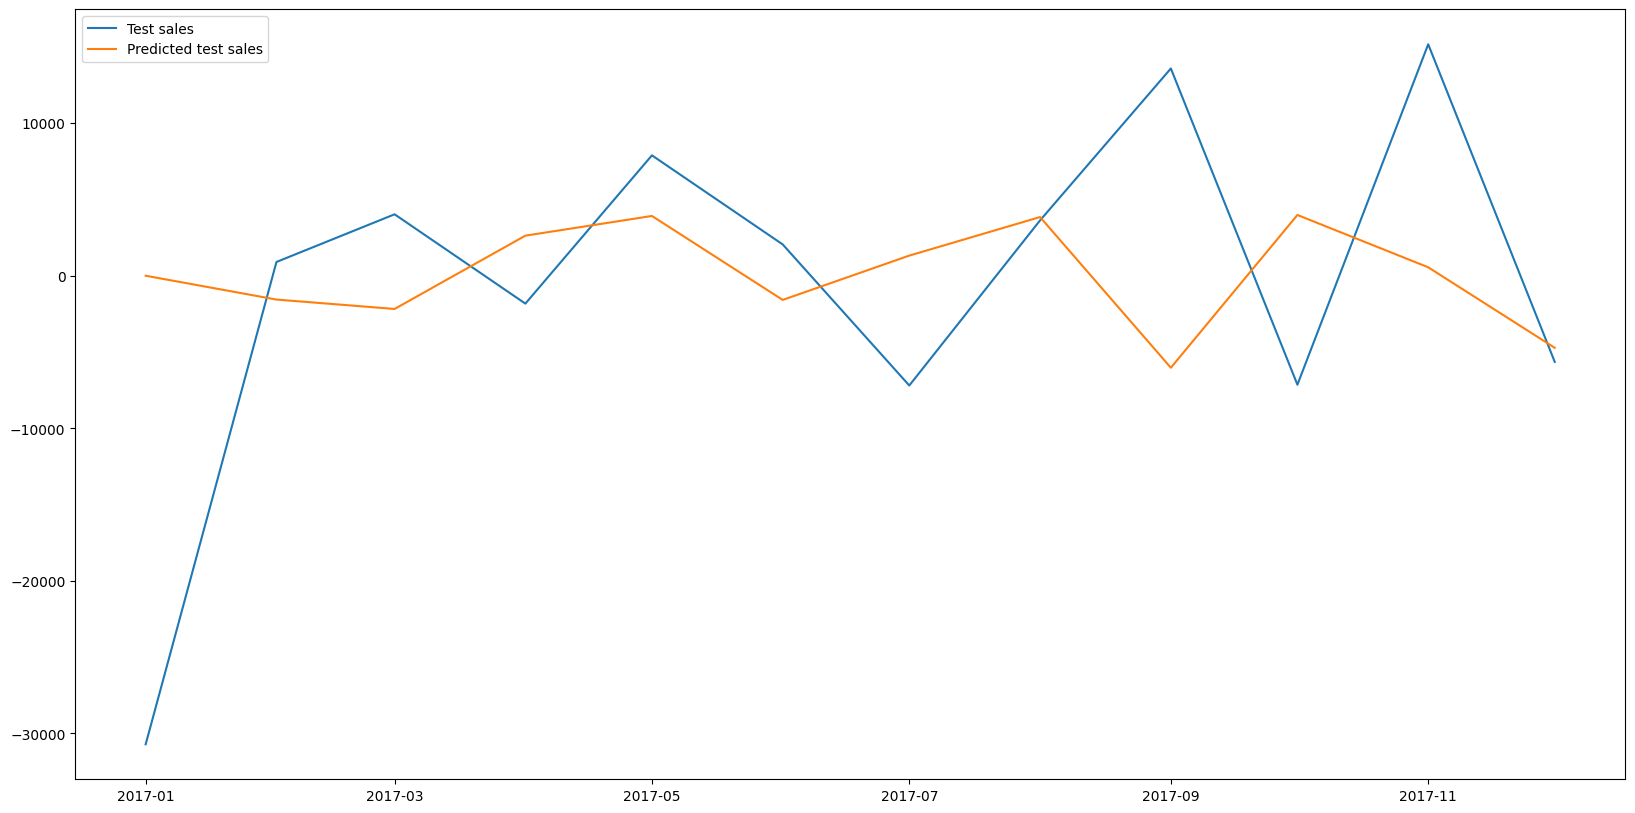

In [31]:
plt.plot(df_test["date"], df_test["sales_diff"])
plt.plot(df_test["date"], df_test["predicted_sales"])
plt.legend(['Test sales', 'Predicted test sales'])
plt.show()

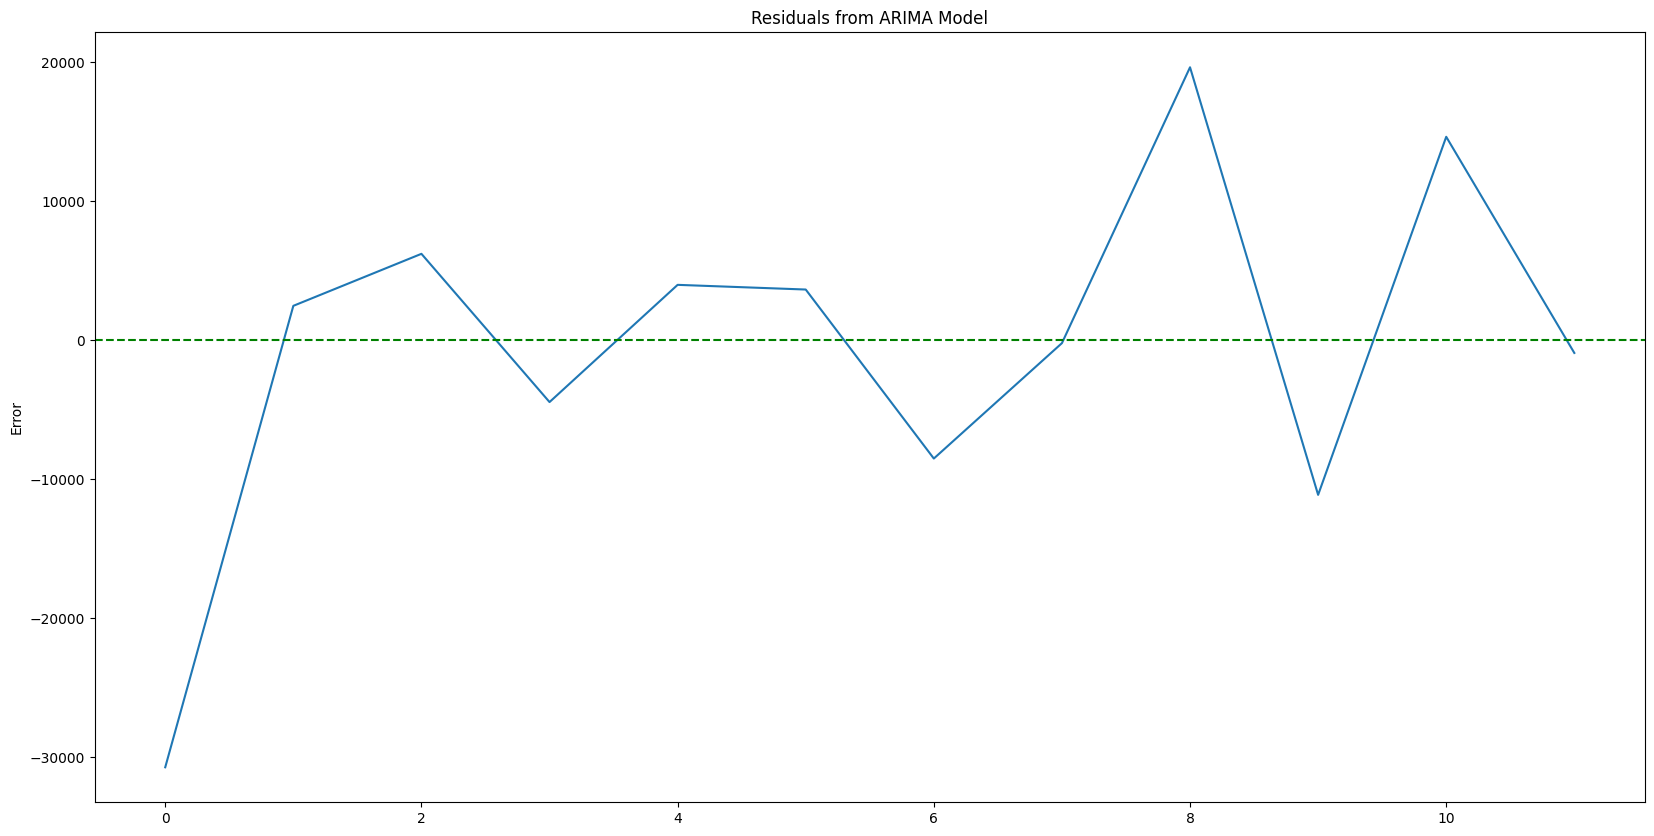

In [32]:
df_test['residuals'].plot(kind = 'line', title = 'Residuals from ARIMA Model')
plt.axhline(0,color ='g', linestyle = '--')
plt.ylabel('Error')
plt.show()

Note that, the residual ranges from -30000 to 20000. This means, the ARIMA model is underestimating or overestimating the sales in most cases.
While plotting the sales data we saw that there is some seasonal component. Therefore I am using SARIMA model to capture the seasonality effect.

#SARIMA MODEL

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model on training data
model = SARIMAX(df_train['sales_diff'], order=(2, 1, 1), seasonal_order=(2, 1, 1, 12))
model_fit = model.fit(disp=False)

# Summary of the model
print(model_fit.summary())

# Generate forecast for the test period
forecast_start = len(df_train)
forecast_end = len(df_train) + len(df_test) - 1
forecast_diff = model_fit.predict(start=forecast_start, end=forecast_end)


                                     SARIMAX Results                                      
Dep. Variable:                         sales_diff   No. Observations:                   35
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -220.068
Date:                            Wed, 12 Jun 2024   AIC                            454.136
Time:                                    03:52:41   BIC                            461.774
Sample:                                         0   HQIC                           455.935
                                             - 35                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4959      0.477     -1.041      0.298      -1.430       0.438
ar.L2         -0.1021      0.440   

In [34]:
df_test['forecast_sales_diff'] = forecast_diff.values

df_test

,date,sales,sales_diff,predicted_sales,residuals,forecast_sales_diff
0,2017-01-01,5964.0320,-30714.6830,0.000000,-30714.683000,-23362.945559
1,2017-02-01,6866.3374,902.3054,-1561.795193,2464.100593,-5025.845110
2,2017-03-01,10893.4448,4027.1074,-2177.490162,6204.597562,9217.444133
3,2017-04-01,9065.9581,-1827.4867,2627.064634,-4454.551334,17.056345
4,2017-05-01,16957.5582,7891.6001,3918.119039,3973.481061,960.560449
5,2017-06-01,19008.5867,2051.0285,-1585.627156,3636.655656,-2956.105329
6,2017-07-01,11813.0220,-7195.5647,1319.913305,-8515.478005,2777.519251
7,2017-08-01,15441.8740,3628.8520,3846.978260,-218.126260,-1958.327532
8,2017-09-01,29028.2060,13586.3320,-6030.944018,19617.276018,16518.238315
9,2017-10-01,21884.0682,-7144.1378,3983.065477,-11127.203277,-16586.474784


In [35]:
R_squared = r2_score(df_test['sales_diff'], df_test['forecast_sales_diff'])
print("R-squared:", R_squared)

R-squared: 0.6905354457657837


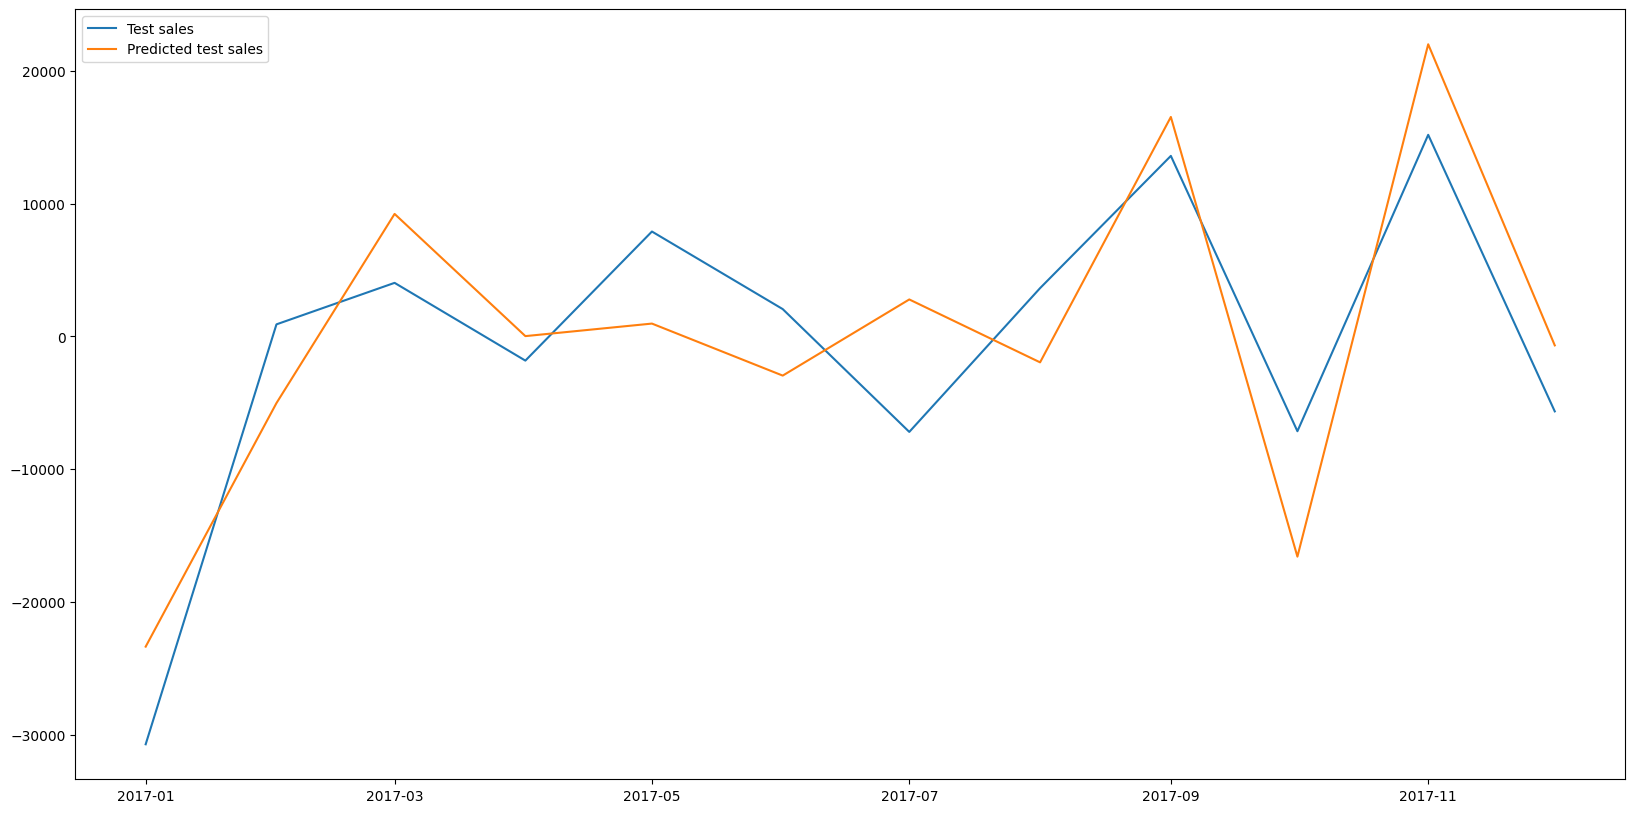

In [36]:
plt.plot(df_test["date"], df_test["sales_diff"])
plt.plot(df_test["date"], df_test["forecast_sales_diff"])
plt.legend(['Test sales', 'Predicted test sales'])
plt.show()

#Rescaling the data

In [37]:
last_observed = df_train['sales'].iloc[-1]
forecast_sales = last_observed + forecast_diff.cumsum()

df_test['forecast_sales'] = forecast_sales.values

In [38]:
df_test["residuals_Sarima"]= df_test["sales"] - df_test["forecast_sales"]

In [39]:
df_test = df_test.drop(["sales_diff", "forecast_sales_diff", "predicted_sales", "residuals"], axis= 1)
df_test

,date,sales,forecast_sales,residuals_Sarima
0,2017-01-01,5964.0320,13315.769441,-7351.737441
1,2017-02-01,6866.3374,8289.924331,-1423.586931
2,2017-03-01,10893.4448,17507.368463,-6613.923663
3,2017-04-01,9065.9581,17524.424808,-8458.466708
4,2017-05-01,16957.5582,18484.985257,-1527.427057
5,2017-06-01,19008.5867,15528.879927,3479.706773
6,2017-07-01,11813.0220,18306.399179,-6493.377179
7,2017-08-01,15441.8740,16348.071646,-906.197646
8,2017-09-01,29028.2060,32866.309961,-3838.103961
9,2017-10-01,21884.0682,16279.835178,5604.233022


In [40]:
R_squared = r2_score(df_test['sales'], df_test['forecast_sales'])
print("R-squared:", R_squared)

R-squared: 0.7205046262641687


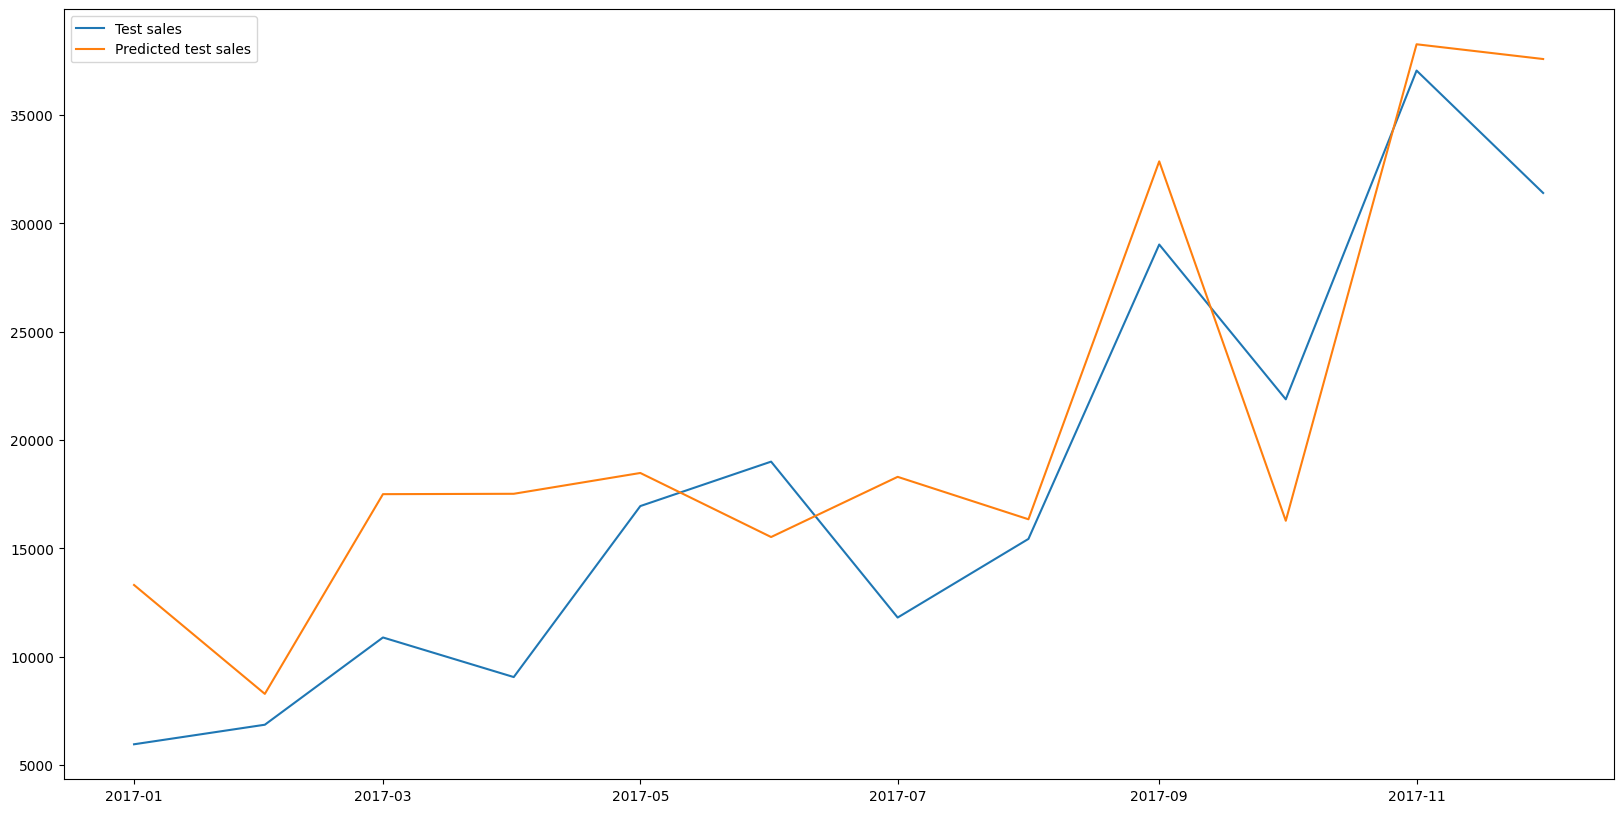

In [41]:
plt.plot(df_test["date"], df_test["sales"])
plt.plot(df_test["date"], df_test["forecast_sales"])
plt.legend(['Test sales', 'Predicted test sales'])
plt.show()

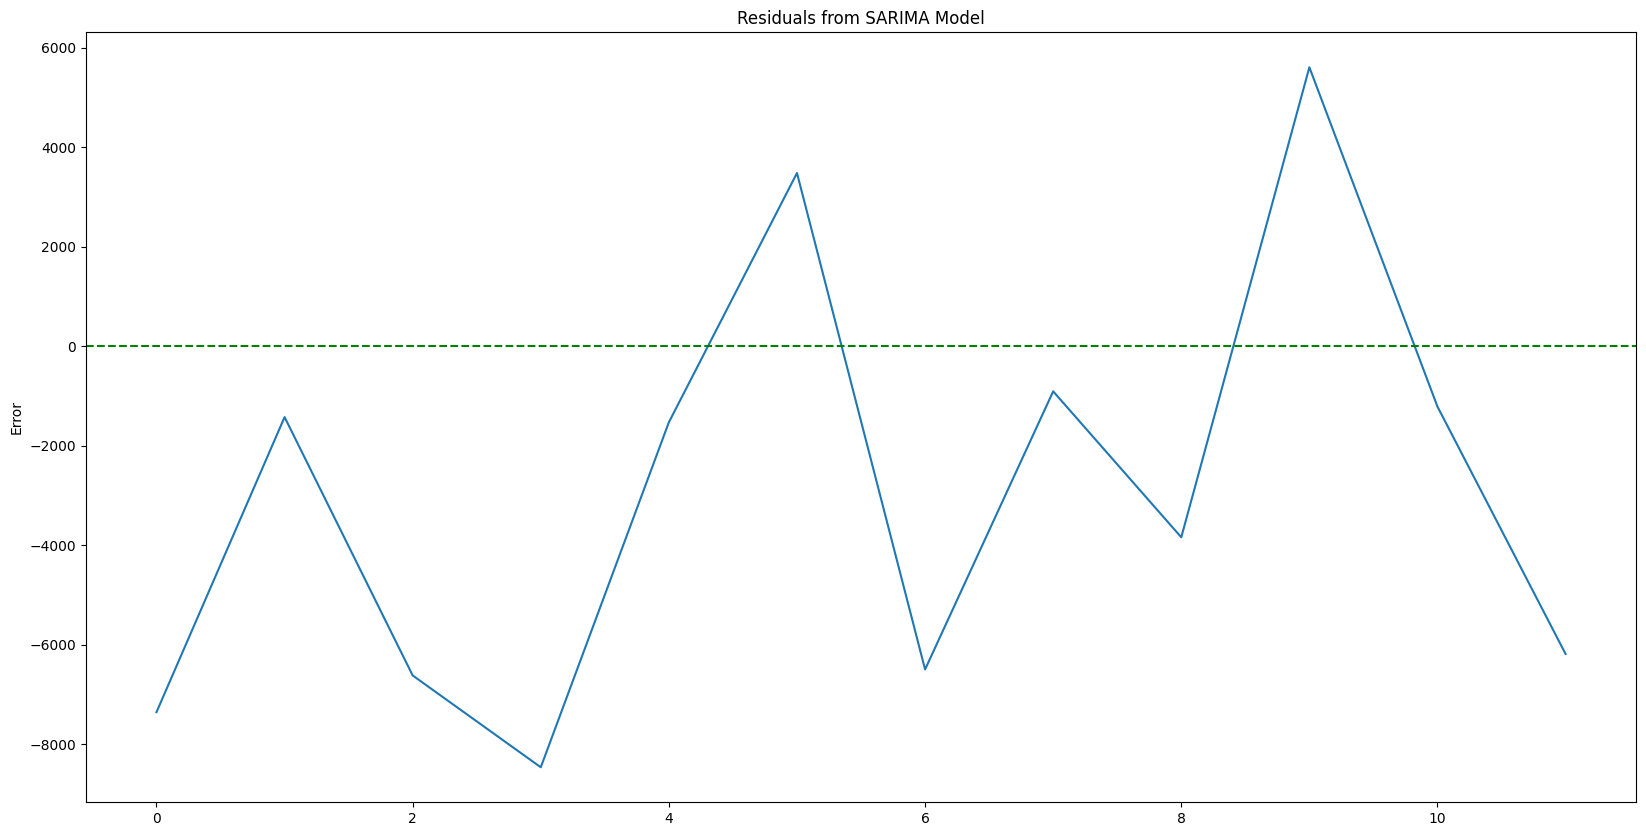

In [42]:
df_test['residuals_Sarima'].plot(kind = 'line', title = 'Residuals from SARIMA Model')
plt.axhline(0,color ='g', linestyle = '--')
plt.ylabel('Error')
plt.show()

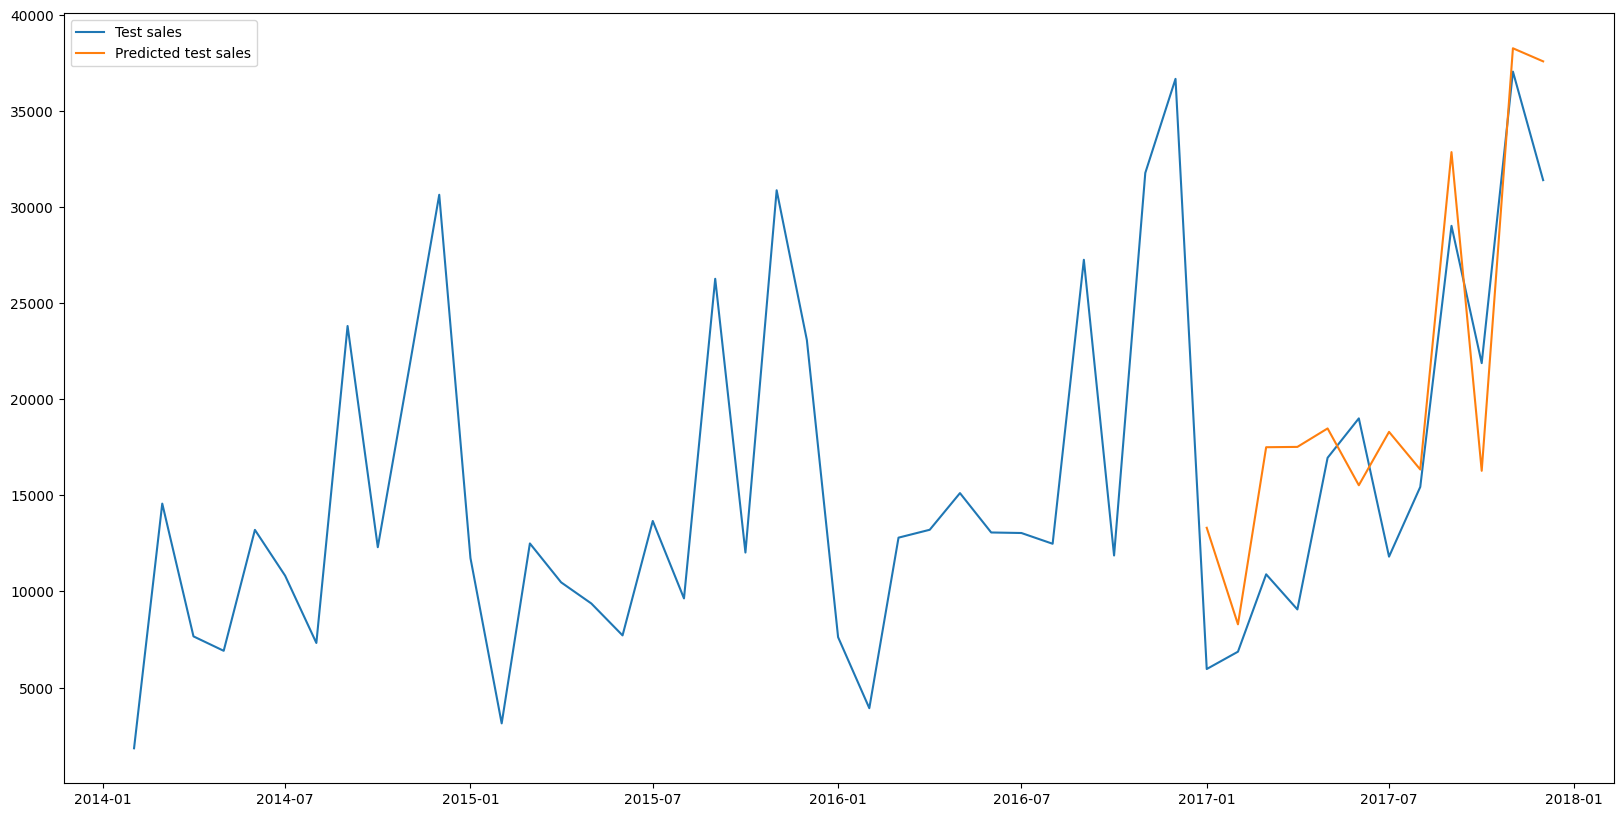

In [43]:
plt.plot(Monthlysales["date"], Monthlysales["sales"])
plt.plot(df_test["date"], df_test["forecast_sales"])
plt.legend(['Test sales', 'Predicted test sales'])
plt.show()

#Future Forecasting

In [44]:
future_dates = pd.date_range(start='2018-01-01', end='2018-12-01', freq='MS')
future_df = pd.DataFrame({'date': future_dates})

In [45]:
future_df

,date
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


In [46]:
model = SARIMAX(Monthlysales['sales_diff'], order=(2, 1, 1), seasonal_order=(2, 1, 1, 12))
model_fit = model.fit(disp=False)

forecast_start = len(df_train)+len(df_test)
forecast_end = len(df_train) + len(df_test) + len(future_df)-1
forecast_diff_future = model_fit.predict(start=forecast_start, end=forecast_end)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [47]:
last_observed = df_test['sales'].iloc[-1]
forecast_sales = last_observed + forecast_diff_future.cumsum()

In [48]:
future_df['sales'] = forecast_sales.values

In [49]:
future_df

,date,sales
0,2018-01-01,9301.273817
1,2018-02-01,8947.130726
2,2018-03-01,14494.014752
3,2018-04-01,13171.086370
4,2018-05-01,20048.199846
5,2018-06-01,21779.625722
6,2018-07-01,14306.540551
7,2018-08-01,17446.246366
8,2018-09-01,31294.482361
9,2018-10-01,21863.033724


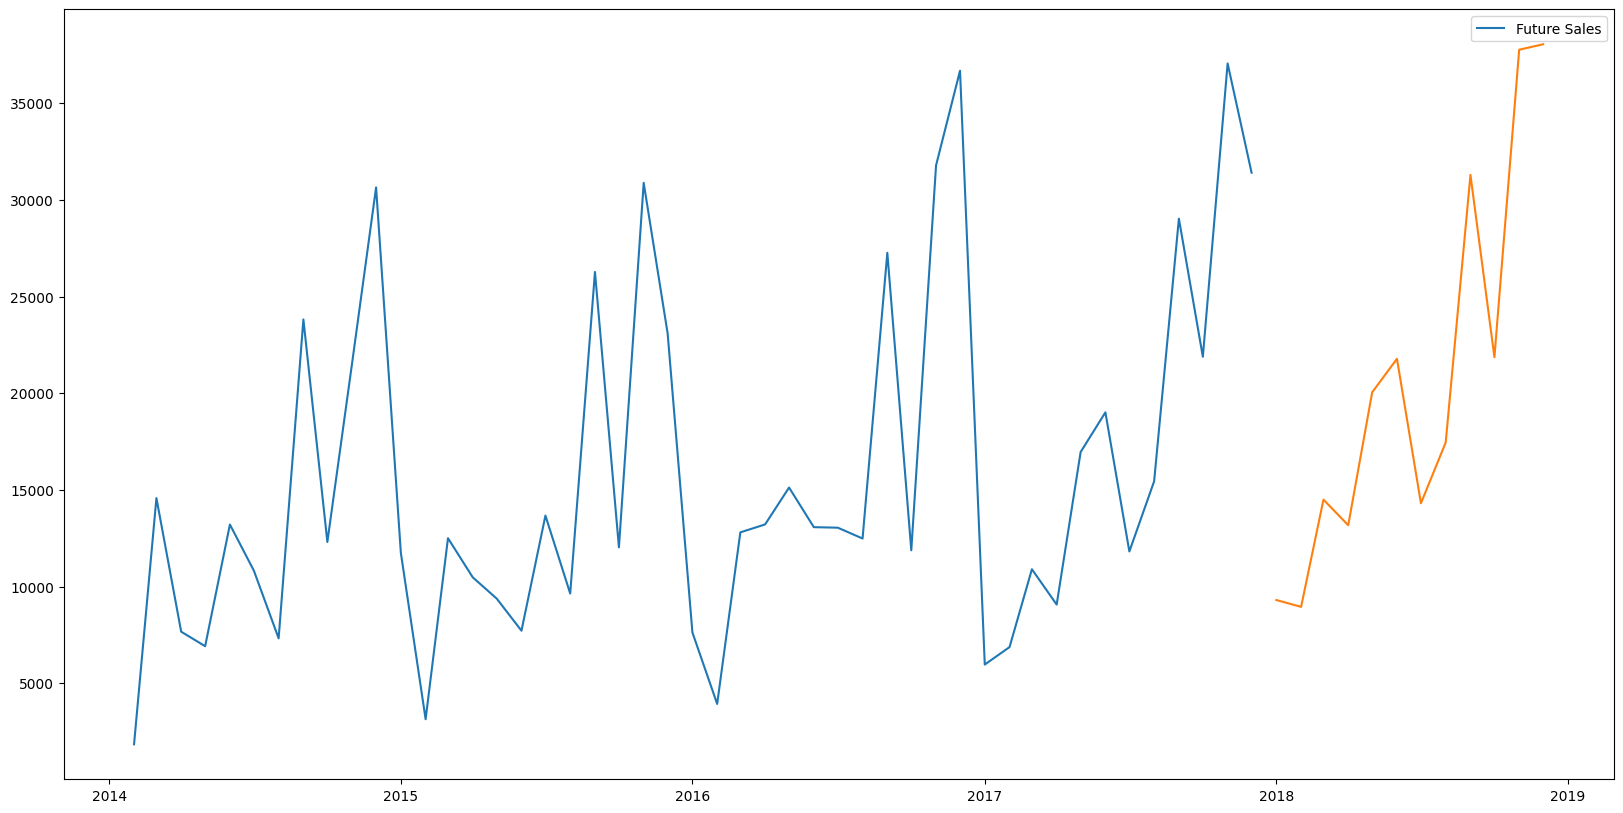

In [50]:
plt.plot(Monthlysales["date"], Monthlysales["sales"])
plt.plot(future_df["date"], future_df['sales'])
plt.legend(['Future Sales'])
plt.show()

#Combining the data for a better plot

In [51]:
Combined_data = pd.concat([Monthlysales[["date", "sales"]], future_df], axis=0)

Combined_data

,date,sales
1,2014-02-01,1839.658000
2,2014-03-01,14573.956000
3,2014-04-01,7663.465000
4,2014-05-01,6912.787000
5,2014-06-01,13206.125600
6,2014-07-01,10821.051000
7,2014-08-01,7320.346500
8,2014-09-01,23816.480800
9,2014-10-01,12304.247000
10,2014-11-01,21564.872700


In [52]:
Combined_data.reset_index(drop=True, inplace=True)

In [53]:
Combined_data

,date,sales
0,2014-02-01,1839.658000
1,2014-03-01,14573.956000
2,2014-04-01,7663.465000
3,2014-05-01,6912.787000
4,2014-06-01,13206.125600
5,2014-07-01,10821.051000
6,2014-08-01,7320.346500
7,2014-09-01,23816.480800
8,2014-10-01,12304.247000
9,2014-11-01,21564.872700


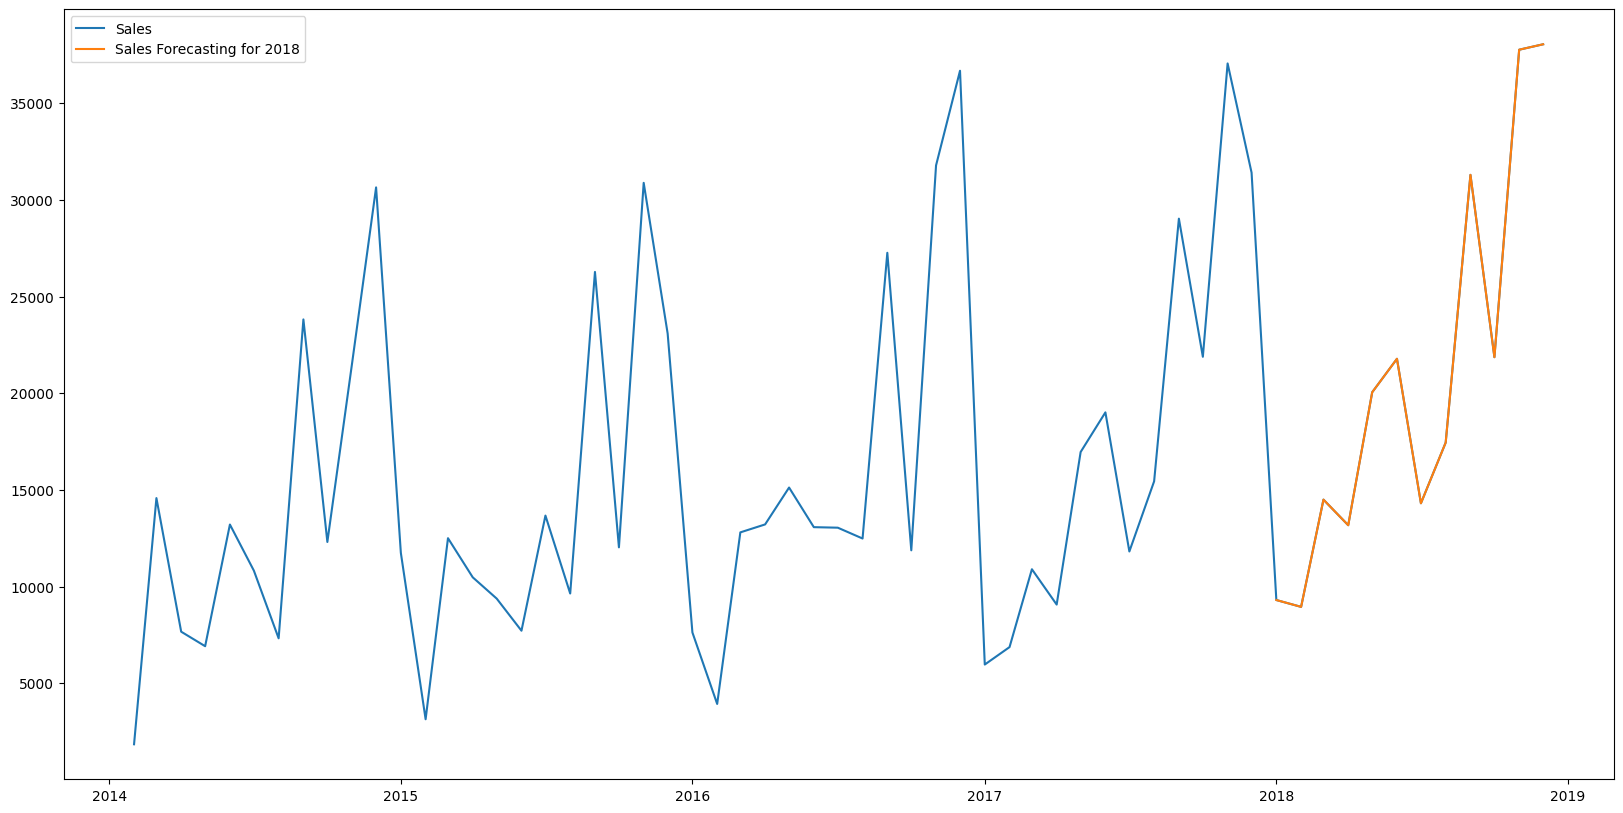

In [54]:
plt.plot(Combined_data["date"], Combined_data['sales'])
plt.plot(future_df["date"], future_df['sales'])
plt.legend(['Sales', 'Sales Forecasting for 2018'])
plt.show()